In [1]:
import pandas as pd

In [43]:
# 파일 읽기
# 만약 에러나는 데이터가 있다면. 한두개 에러 데이터.
# 해당 데이터는 생략하는 것이 일반적임.
# doc = pd.read_csv('파일명', encoding='utf-8-sig', error_bad_lines=False)

path = 'file/COVID-19-master/csse_covid_19_data/csse_covid_19_daily_reports/'
doc = pd.read_csv(path + '04-01-2020.csv', encoding='utf-8-sig')
doc.head()


,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-01 21:58:49,34.223334,-82.461707,4,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-01 21:58:49,30.295065,-92.414197,47,1,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-01 21:58:49,37.767072,-75.632346,7,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-01 21:58:49,43.452658,-116.241552,195,3,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-01 21:58:49,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"


In [4]:
# 탐색적 데이터 분석 1. 데이터의 출처와 주제에 대해 이해
# 국가별 코로나 바이러스 데일리 현황자료
# from 존스 홉킨스 대학
# raw 데이터를 어떻게 가져왔는지 대해서도 알 필요가 있음.

In [5]:
# 탐색적 데이터 분석 2. 데이터 크기 확인
# 행과 열
doc.shape

(2483, 12)

In [6]:
doc.columns
doc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483 entries, 0 to 2482
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FIPS            2171 non-null   float64
 1   Admin2          2221 non-null   object 
 2   Province_State  2307 non-null   object 
 3   Country_Region  2483 non-null   object 
 4   Last_Update     2483 non-null   object 
 5   Lat             2482 non-null   float64
 6   Long_           2482 non-null   float64
 7   Confirmed       2483 non-null   int64  
 8   Deaths          2483 non-null   int64  
 9   Recovered       2483 non-null   int64  
 10  Active          2483 non-null   int64  
 11  Combined_Key    2483 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 232.9+ KB


In [7]:
# 탐색적 데이터 분석 3. 데이터 구성 요소 (feature)의 속성 확인

In [8]:
doc.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key'],
      dtype='object')

In [9]:
# 속성이 숫자라면, 평균, 표준편차, 4분위수, 최소/최대값 확인
doc.describe()

,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active
count,2171.000000,2482.000000,2482.000000,2483.000000,2483.000000,2483.000000,2483.000000
mean,30017.933671,35.648140,-77.259529,375.596053,18.851792,77.797422,195.069271
std,15494.172170,11.348356,44.340152,4210.635475,351.565670,1506.657766,2798.254454
min,1001.000000,-42.882100,-159.596679,0.000000,0.000000,0.000000,0.000000
25%,18050.000000,33.206991,-94.768959,2.000000,0.000000,0.000000,0.000000
50%,29027.000000,37.565526,-86.181966,7.000000,0.000000,0.000000,0.000000
75%,45016.000000,41.416065,-79.409001,34.000000,1.000000,0.000000,0.000000
max,99999.000000,71.706900,178.065000,110574.000000,13155.000000,63326.000000,80572.000000


In [11]:
# 속성간 상관관계 이해하기
# 피어슨 상관계수가 디폴트
# 0에 가까우면 없고, 1에 가까우면 양의 상관관계, -1에 가까우면 음의 상관관계
# raw 데이터를 어떻게 가져왔는지 대해서도 알 필요가 있음.
doc.corr()


,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active
FIPS,1.000000,0.144217,0.139813,0.003306,-0.000190,NaN,NaN
Lat,0.144217,1.000000,-0.487517,0.028217,0.021578,-0.004630,0.029301
Long_,0.139813,-0.487517,1.000000,0.157110,0.104027,0.155989,0.143738
Confirmed,0.003306,0.028217,0.157110,1.000000,0.886551,0.727257,0.913162
Deaths,-0.000190,0.021578,0.104027,0.886551,1.000000,0.567840,0.880624
Recovered,NaN,-0.004630,0.155989,0.727257,0.567840,1.000000,0.493139
Active,NaN,0.029301,0.143738,0.913162,0.880624,0.493139,1.000000


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

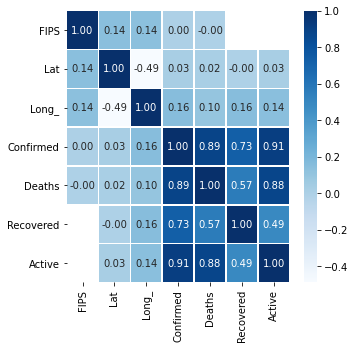

In [14]:
plt.figure(figsize=(5,5))
sns.heatmap(doc.corr(), annot=True, fmt='.2f', linewidths=0.5, cmap="Blues")

----

In [17]:
# pandas 라이브러리로 데이터 처리하기
# 코로나 바이러스 데이터와 함께 라이브러리 익히기

doc.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-01 21:58:49,34.223334,-82.461707,4,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-01 21:58:49,30.295065,-92.414197,47,1,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-01 21:58:49,37.767072,-75.632346,7,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-01 21:58:49,43.452658,-116.241552,195,3,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-01 21:58:49,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"


In [19]:
countries = doc['Country_Region']
countries.head()

0    US
1    US
2    US
3    US
4    US
Name: Country_Region, dtype: object

In [20]:
# 시리즈로 속성을 보다 상세하게 탐색하기
print(countries.size, countries.count())

2483 2483


In [22]:
print(countries.unique(), len(countries.unique()))

['US' 'Canada' 'United Kingdom' 'China' 'Netherlands' 'Australia'
 'Denmark' 'France' 'Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Austria' 'Azerbaijan'
 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi' 'Cabo Verde'
 'Cambodia' 'Cameroon' 'Central African Republic' 'Chad' 'Chile'
 'Colombia' 'Congo (Brazzaville)' 'Congo (Kinshasa)' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Diamond Princess'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Fiji' 'Finland' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Holy See' 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran'
 'Iraq' 'Ireland' 'Israel' 'It

In [23]:
countries.value_counts()

US                2228
China               33
Canada              15
France              10
United Kingdom      10
                  ... 
Seychelles           1
Ecuador              1
Dominica             1
El Salvador          1
Romania              1
Name: Country_Region, Length: 180, dtype: int64

In [25]:
# 필요한 컬럼만 선택하기

covid_stat = doc[['Confirmed', 'Deaths', 'Recovered']]
covid_stat

,Confirmed,Deaths,Recovered
0,4,0,0
1,47,1,0
2,7,0,0
3,195,3,0
4,1,0,0
...,...,...,...
2478,143,3,41
2479,218,0,63
2480,134,1,18
2481,36,0,0


In [40]:
# 특정 조건에 맞는 row 검색하기

doc_US = doc[doc['Country_Region'] == 'US']
doc_US

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-01 21:58:49,34.223334,-82.461707,4,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-01 21:58:49,30.295065,-92.414197,47,1,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-01 21:58:49,37.767072,-75.632346,7,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-01 21:58:49,43.452658,-116.241552,195,3,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-01 21:58:49,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"
...,...,...,...,...,...,...,...,...,...,...,...,...
2246,66000.0,NaN,Guam,US,2020-04-01 21:58:49,13.444300,144.793700,77,3,0,0,"Guam, US"
2273,NaN,NaN,Northern Mariana Islands,US,2020-04-01 21:58:49,15.097900,145.673900,6,1,0,0,",Northern Mariana Islands,US"
2279,NaN,NaN,Puerto Rico,US,2020-04-01 21:58:49,18.220800,-66.590100,286,11,0,0,"Puerto Rico, US"
2284,NaN,NaN,Recovered,US,2020-04-01 21:58:49,0.000000,0.000000,0,0,8474,0,"Recovered, US"


In [44]:
doc = pd.read_csv(path + '01-22-2020.csv', encoding='utf-8-sig')
doc.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Anhui,Mainland China,1/22/2020 17:00,1.0,NaN,NaN
1,Beijing,Mainland China,1/22/2020 17:00,14.0,NaN,NaN
2,Chongqing,Mainland China,1/22/2020 17:00,6.0,NaN,NaN
3,Fujian,Mainland China,1/22/2020 17:00,1.0,NaN,NaN
4,Gansu,Mainland China,1/22/2020 17:00,NaN,NaN,NaN


In [45]:
# 없는 데이터 처리하기 (NaN) : 결측치

doc.isnull().sum()

Province/State     3
Country/Region     0
Last Update        0
Confirmed          9
Deaths            37
Recovered         37
dtype: int64

In [46]:
# 없는 데이터 삭제하기

doc_not_null = doc.dropna()
doc_not_null

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
13,Hubei,Mainland China,1/22/2020 17:00,444.0,17.0,28.0


In [47]:
# 특정 컬럼값이 없는 데이터만 삭제하기

doc_subset = doc.dropna(subset=['Confirmed'])
doc_subset

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Anhui,Mainland China,1/22/2020 17:00,1.0,NaN,NaN
1,Beijing,Mainland China,1/22/2020 17:00,14.0,NaN,NaN
2,Chongqing,Mainland China,1/22/2020 17:00,6.0,NaN,NaN
3,Fujian,Mainland China,1/22/2020 17:00,1.0,NaN,NaN
5,Guangdong,Mainland China,1/22/2020 17:00,26.0,NaN,NaN
6,Guangxi,Mainland China,1/22/2020 17:00,2.0,NaN,NaN
7,Guizhou,Mainland China,1/22/2020 17:00,1.0,NaN,NaN
8,Hainan,Mainland China,1/22/2020 17:00,4.0,NaN,NaN
9,Hebei,Mainland China,1/22/2020 17:00,1.0,NaN,NaN
11,Henan,Mainland China,1/22/2020 17:00,5.0,NaN,NaN


In [48]:
# 없는 데이터를 특정값으로 일괄 변경하기

doc_fillna = doc.fillna(0)
doc_fillna.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [55]:
# 없는 데이터 중 특정 컬럼에 대해 특정 값으로 일괄 변경하기

nan_data = {'Deaths': 0, 'Recovered': '없음'}
doc_fillna2 = doc.fillna(nan_data)
doc_fillna2.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,없음
1,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,없음
2,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,없음
3,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,없음
4,Gansu,Mainland China,1/22/2020 17:00,NaN,0.0,없음


---

In [56]:
doc = pd.read_csv(path + '04-01-2020.csv', encoding='utf-8-sig')

In [57]:
# 특정 키값을 기준으로 데이터 합치기
doc_group = doc.groupby('Country_Region').sum()
doc_group.head()

,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active
Country_Region,,,,,,,
Afghanistan,0.0,33.93911,67.709953,237,4,5,228
Albania,0.0,41.15330,20.168300,259,15,67,177
Algeria,0.0,28.03390,1.659600,847,58,61,728
Andorra,0.0,42.50630,1.521800,390,14,10,366
Angola,0.0,-11.20270,17.873900,8,2,1,5


In [60]:
doc_group.columns

Index(['FIPS', 'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active'], dtype='object')

In [61]:
doc_group.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Ukraine', 'United Arab Emirates', 'United Kingdom', 'Uruguay',
       'Uzbekistan', 'Venezuela', 'Vietnam', 'West Bank and Gaza', 'Zambia',
       'Zimbabwe'],
      dtype='object', name='Country_Region', length=180)

In [62]:
doc_group[doc_group.index == 'US']

,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active
Country_Region,,,,,,,
US,65168934.0,82956.96013,-197553.963757,213372,4757,8474,0


In [65]:
# 컬럼 타입 변경하기
doc = pd.read_csv(path + '01-22-2020.csv', encoding='utf-8-sig')
doc = doc[['Country/Region', 'Confirmed']]
doc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country/Region  38 non-null     object 
 1   Confirmed       29 non-null     float64
dtypes: float64(1), object(1)
memory usage: 736.0+ bytes


In [67]:
# astype(컬럼명: 변경할 타입)
# 변경할 데이터에 결측치가 있을 경우, 에러가 날 수도 있음.
# 시리즈 데이터일 경우, Series.astype(변경할 타입) 으로 쓰면 됨

doc = doc.dropna(subset=['Confirmed'])
doc = doc.astype({'Confirmed': 'int64'})
doc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 37
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country/Region  29 non-null     object
 1   Confirmed       29 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 696.0+ bytes


In [68]:
doc.head()

,Country/Region,Confirmed
0,Mainland China,1
1,Mainland China,14
2,Mainland China,6
3,Mainland China,1
5,Mainland China,26


In [69]:
# 데이터 프레임 컬럼명 변경하기

doc.columns = ['Country_Region', 'Confirmed']
doc.columns

Index(['Country_Region', 'Confirmed'], dtype='object')

In [70]:
# 데이터 프레임에서 중복 행 확인/제거 하기

doc = pd.read_csv('./file/COVID-19-master/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv', encoding='utf-8-sig')
doc = doc[['iso2', 'Country_Region']]
doc.head()

,iso2,Country_Region
0,BW,Botswana
1,BI,Burundi
2,SL,Sierra Leone
3,AF,Afghanistan
4,AL,Albania


In [71]:
# drop_duplicates(): 중복 행 삭제
# 특정 컬럼을 기준으로 중복 행 제거하기
# - subset=특정컬럼
# 중복된 경우, 처음과 마지막 행 중 어느 행을 남길 것인가
# - keep='last', 'first'

doc = doc.drop_duplicates(keep='last')
doc.head()

,iso2,Country_Region
0,BW,Botswana
1,BI,Burundi
2,SL,Sierra Leone
3,AF,Afghanistan
4,AL,Albania
